In [89]:
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [108]:
class Wave:
    frequency = [50, 70]

    def __init__(self, t):
        self.t = t

    def __call__(self, *args, **kwargs):
        return np.sin(2 * np.pi * self.frequency[0] * self.t) + np.cos(2 * np.pi * self.frequency[1] * self.t)

In [109]:
sp = 1024  # sampling size
t_max = .1
dt = t_max / sp  # sampling interval (s)
sf = sp / t_max  # sampling frequency (sampling points in 1s)
print('sampling frequency', sf, 'Hz')
t = np.arange(0, t_max, dt)
assert sf > 2 * max(Wave.frequency), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the signal'
y = Wave(t)()
print('y.shape', y.shape)

sampling frequency 10240.0 Hz
y.shape (1024,)


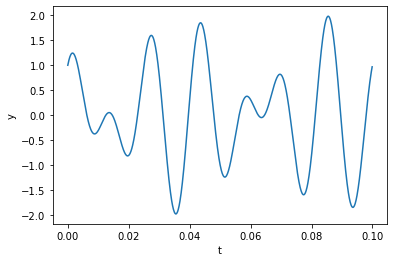

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.plot(t, y)

In [111]:
fft_result = np.fft.fft(y)
abs_fft = np.abs(fft_result)

(0.0, 100.0)

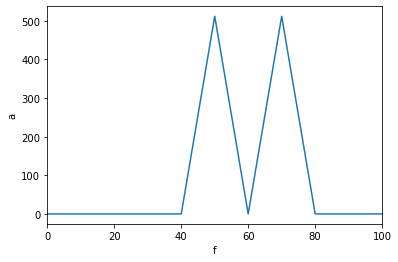

In [112]:
freq = np.arange(0, sf, sf / sp)
# T = sp / sf
# FREQ = n / T
plt.close()
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('f')
ax.set_ylabel('a')
ax.plot(freq, abs_fft)
plt.xlim(0, sf / 2)
plt.xlim(0, 100)

In [113]:
ifft_result = np.fft.ifft(fft_result).real

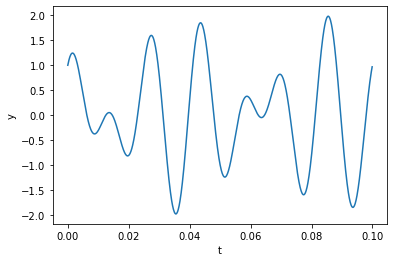

In [114]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.plot(t, ifft_result)